In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 20,10
import warnings
warnings.filterwarnings("ignore")

In [33]:
df = pd.read_csv(r"E:\Academics\Notes\Deep Learning\Batch 103 Day 52\Solar Data Set.csv")

In [34]:
df

,Date,Solar Ir
0,1/1/2019 0:00,0.0
1,1/1/2019 1:00,0.0
2,1/1/2019 2:00,0.0
3,1/1/2019 3:00,0.0
4,1/1/2019 4:00,0.0
...,...,...
8755,12/31/2019 19:00,0.0
8756,12/31/2019 20:00,0.0
8757,12/31/2019 21:00,0.0
8758,12/31/2019 22:00,0.0


In [35]:
df.dropna(inplace=True)

In [36]:
df.shape

(8760, 2)

In [37]:
training_set = df.iloc[:8712,1:2].values

In [38]:
training_set

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [39]:
training_set.shape

(8712, 1)

In [40]:
testing_set = df.iloc[8712:,1:2].values

In [41]:
testing_set

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.01693333],
       [0.09424507],
       [0.1371626 ],
       [0.15909154],
       [0.16490746],
       [0.15638263],
       [0.13107571],
       [0.08334421],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.01664971],
       [0.09403712],
       [0.13707843],
       [0.15912329],
       [0.16504743],
       [0.15665653],
       [0.1315364 ],
       [0.08412501],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [42]:
testing_set.shape

(48, 1)

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
sc = MinMaxScaler(feature_range=(0,1))

In [45]:
training_set_scaled = sc.fit_transform(training_set)
testing_set_scaled = sc.fit_transform(testing_set)

In [46]:
x_train = []
y_train = []
WS = 24

In [47]:
for i in range(WS, len(training_set_scaled)):
    x_train.append(training_set_scaled[i-WS:i, 0:1])
    y_train.append(training_set_scaled[i,0])

In [48]:
x_train = np.array(x_train)

In [49]:
y_train = np.array(y_train)

In [50]:
x_train.shape

(8688, 24, 1)

In [51]:
y_train.shape

(8688,)

In [52]:
pd.DataFrame(x_train.reshape(8688,24))

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.088258,0.503684,...,0.709194,0.456985,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.088258,0.503684,0.735352,...,0.456985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.088258,0.503684,0.735352,0.854364,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.088258,0.503684,0.735352,0.854364,0.886850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.088258,0.503684,0.735352,0.854364,0.886850,0.842719,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8683,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.507068,0.736642,0.853666,0.884281,0.837817,0.701025,0.443209,0.0,0.0,0.0
8684,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.736642,0.853666,0.884281,0.837817,0.701025,0.443209,0.000000,0.0,0.0,0.0
8685,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.853666,0.884281,0.837817,0.701025,0.443209,0.000000,0.000000,0.0,0.0,0.0
8686,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.884281,0.837817,0.701025,0.443209,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [53]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Input

In [54]:
Model_p = Sequential()

In [55]:
Model_p.add(Input(shape=(x_train.shape[1], 1)))

In [56]:
Model_p.add(LSTM(units=60, return_sequences=True))
Model_p.add(Dropout(0.2))

In [57]:
Model_p.add(LSTM(units=60, return_sequences=True))
Model_p.add(Dropout(0.2))

In [58]:
Model_p.add(LSTM(units=60, return_sequences=True))
Model_p.add(Dropout(0.2))

In [59]:
Model_p.add(LSTM(units=60))
Model_p.add(Dropout(0.2))

In [60]:
Model_p.add(Dense(units=1))

In [61]:
Model_p.compile(optimizer="adam", loss="mean_squared_error")

In [62]:
Model_p.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - loss: 0.0554
Epoch 2/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 16s 60ms/step - loss: 0.0074
Epoch 3/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - loss: 0.0054
Epoch 4/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - loss: 0.0039
Epoch 5/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 0.0031
Epoch 6/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - loss: 0.0026
Epoch 7/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - loss: 0.0021
Epoch 8/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 0.0023
Epoch 9/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - loss: 0.0017
Epoch 10/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - loss: 0.0019
Epoch 11/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - loss: 0.0018
Epoch 12/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0015
Epoch 13/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 0.0016
Epoch 14/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 0.0016
Epoch 15/30
272/272 ━━━━━━━━━

In [75]:
prediction_test = []
Batch_one = training_set_scaled[-WS:]  # Extract last 24 records from training 
Batch_New = Batch_one.reshape((1,WS,1)) # Reshape as the same format

In [76]:
for i in range(48):
    First_Pred = Model_p.predict(Batch_New)[0]
    prediction_test.append(First_Pred)
    Batch_New = np.append(Batch_New[:,1:,:], [[First_Pred]], axis = 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step

In [77]:
Batch_New.shape

(1, 24, 1)

In [78]:
prediction_test = np.array(prediction_test)

In [79]:
prediction_test.shape

(48, 1)

In [80]:
predictions = sc.inverse_transform(prediction_test)

In [81]:
predictions

array([[0.00058486],
       [0.00065086],
       [0.00072255],
       [0.00077367],
       [0.00080432],
       [0.00088777],
       [0.00121134],
       [0.00133238],
       [0.01438745],
       [0.08129761],
       [0.11786562],
       [0.13712367],
       [0.1448857 ],
       [0.13623524],
       [0.11291286],
       [0.06682692],
       [0.00084719],
       [0.00083627],
       [0.00082688],
       [0.00081494],
       [0.00079121],
       [0.00074577],
       [0.00068632],
       [0.00064481],
       [0.00064498],
       [0.00067877],
       [0.00072535],
       [0.00076578],
       [0.00080695],
       [0.00093778],
       [0.00131477],
       [0.00140031],
       [0.01224182],
       [0.0766439 ],
       [0.11427411],
       [0.13464071],
       [0.14346604],
       [0.13441429],
       [0.11065265],
       [0.06399711],
       [0.0012532 ],
       [0.0012069 ],
       [0.00115033],
       [0.001063  ],
       [0.00093959],
       [0.00081301],
       [0.00071998],
       [0.000

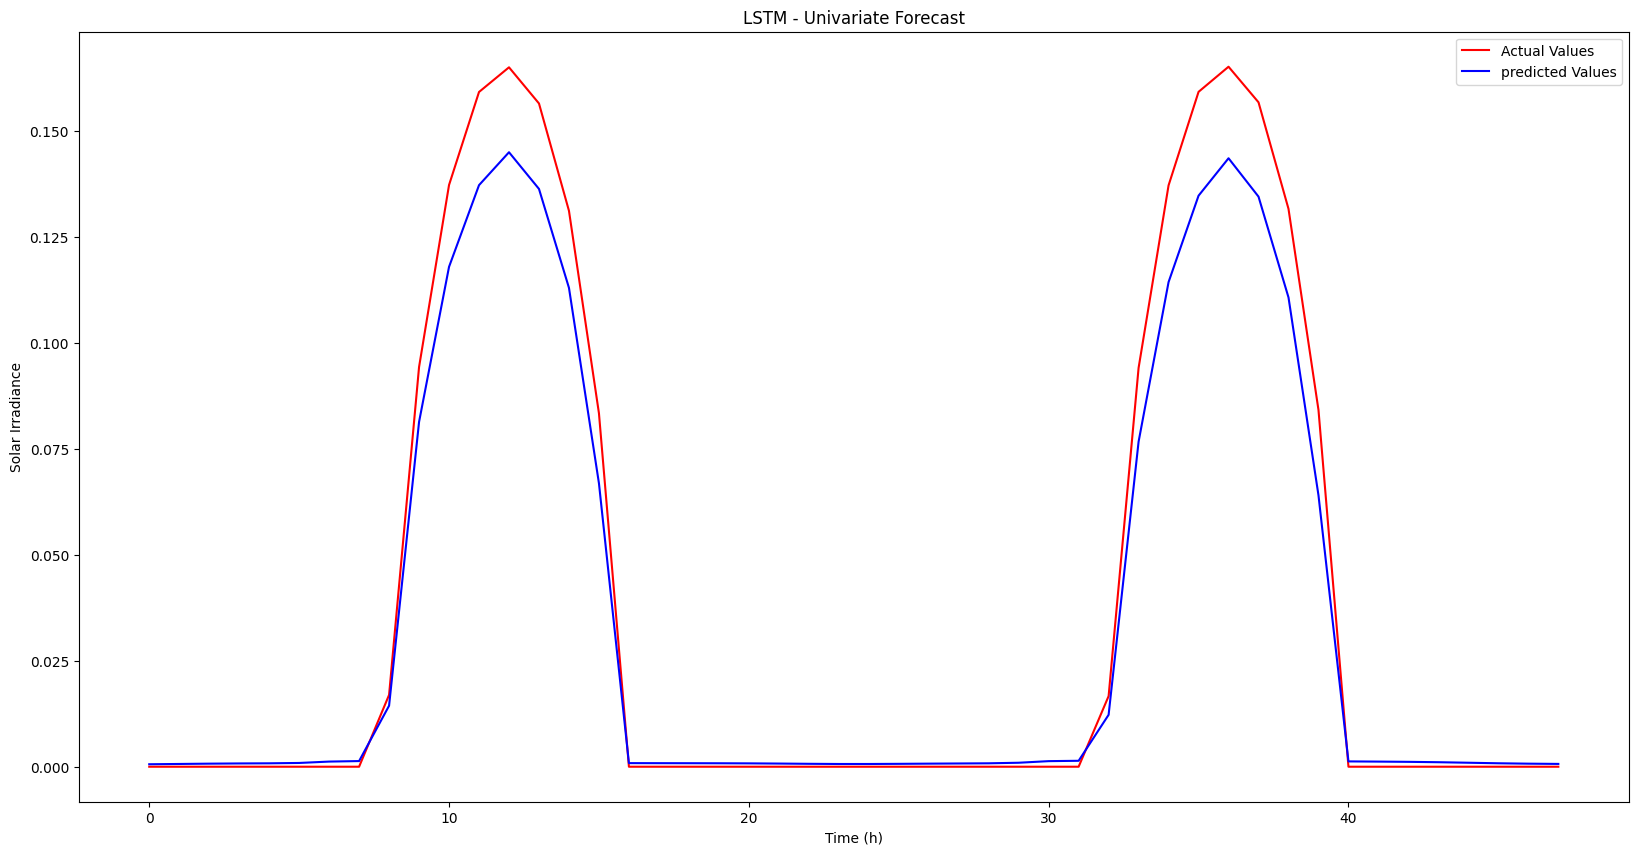

In [82]:
plt.plot(testing_set, color = 'red', label = 'Actual Values')
plt.plot(predictions, color = 'blue', label = 'predicted Values')
plt.title('LSTM - Univariate Forecast')
plt.xlabel('Time (h)')
plt.ylabel('Solar Irradiance')
plt.legend()
plt.show()


In [83]:
import math
from sklearn.metrics import mean_squared_error, r2_score
RMSE = math.sqrt(mean_squared_error(testing_set, predictions))

In [84]:
RMSE

0.010905167951494913

In [85]:
r2_score(testing_set, predictions)

0.9690183594459341